<a href="https://colab.research.google.com/github/satyajitghana/TSAI-DeepVision-EVA4.0/blob/master/12_TinyImageNet/TinyImageNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ResNet18 ModelDiagnostics

## Install the PySodium Library

In [1]:
!pip install --upgrade git+https://github.com/satyajitghana/PySodium.git#egg=py-sodium

  Cloning https://github.com/satyajitghana/PySodium.git to /tmp/pip-install-tula0vvh/py-sodium
  Running command git clone -q https://github.com/satyajitghana/PySodium.git /tmp/pip-install-tula0vvh/py-sodium
  Created wheel for py-sodium: filename=py_sodium-0.0.2-cp36-none-any.whl size=24893 sha256=33a8ee65e037a13d335b832e30a6d691e02e3098ce5e9a2a57bf4cb7dddb0637
  Stored in directory: /tmp/pip-ephem-wheel-cache-d9nqnqpe/wheels/ed/b2/24/860b8aa92c98c5b8e1e724d604e3c4bf4039ab8bb7f66bcc82
Successfully built py-sodium
  Found existing installation: py-sodium 0.0.2
    Uninstalling py-sodium-0.0.2:
      Successfully uninstalled py-sodium-0.0.2


## Create a config file

In [13]:
%%writefile cifar.yml
name: TinyImageNet
save_dir: saved/
seed: 1
target_device: 0

arch:
    type: TinyImageNetS12Model
    args: {}

augmentation:
    type: TinyImageNetAlbumentations
    args: {}

data_loader:
    type: TinyImageNetDataLoader
    args:
        batch_size: 256
        data_dir: data/
        nworkers: 6
        shuffle: True

lr_finder:
    epochs: 20

criterion: cross_entropy_loss

lr_scheduler:
    max_lr_at_epoch: 18
    type: OneCycleLR
    args:
        max_lr: 0.1

optimizer:
    type: SGD
    args:
        lr: 0.001
        momentum: 0.95
        weight_decay: 0.0005

training:
    epochs: 50

Overwriting cifar.yml


## Import sodium

In [0]:
from sodium.utils import load_config
import sodium.runner as runner

## Create a runner with the config and train the model

In [15]:
!nvidia-smi

Fri Apr 24 23:24:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    36W / 250W |  12641MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [16]:
config = load_config('cifar.yml')
runner = runner.Runner(config)
runner.setup_train(tsai_mode=True)

[ 2020-04-24 23:24:21,706 - sodium.sodium.runner ] INFO: Training Config
[ 2020-04-24 23:24:21,707 - sodium.sodium.runner ] INFO: {'arch': {'args': {}, 'type': 'TinyImageNetS12Model'},
[ 2020-04-24 23:24:21,708 - sodium.sodium.runner ] INFO:  'augmentation': {'args': {}, 'type': 'TinyImageNetAlbumentations'},
[ 2020-04-24 23:24:21,711 - sodium.sodium.runner ] INFO:  'criterion': 'cross_entropy_loss',
[ 2020-04-24 23:24:21,714 - sodium.sodium.runner ] INFO:  'data_loader': {'args': {'batch_size': 256,
[ 2020-04-24 23:24:21,716 - sodium.sodium.runner ] INFO:                           'data_dir': 'data/',
[ 2020-04-24 23:24:21,717 - sodium.sodium.runner ] INFO:                           'nworkers': 6,
[ 2020-04-24 23:24:21,718 - sodium.sodium.runner ] INFO:                           'shuffle': True},
[ 2020-04-24 23:24:21,719 - sodium.sodium.runner ] INFO:                  'type': 'TinyImageNetDataLoader'},
[ 2020-04-24 23:24:21,720 - sodium.sodium.runner ] INFO:  'lr_finder': {'epochs': 



0it [00:00, ?it/s]



  0%|          | 32768/248100043 [00:00<14:25, 286660.81it/s]

  0%|          | 319488/248100043 [00:00<10:34, 390439.35it/s]

  0%|          | 1130496/248100043 [00:00<07:33, 544785.62it/s]

  1%|          | 2605056/248100043 [00:00<05:20, 766124.14it/s]

  2%|▏         | 5398528/248100043 [00:00<03:44, 1081747.67it/s]

  4%|▍         | 10690560/248100043 [00:00<02:34, 1531922.95it/s]

  7%|▋         | 17891328/248100043 [00:00<01:46, 2168149.88it/s]

 10%|█         | 25534464/248100043 [00:00<01:12, 3060148.83it/s]

 14%|█▍        | 35217408/248100043 [00:00<00:49, 4312828.18it/s]

 18%|█▊        | 44539904/248100043 [00:01<00:33, 6041110.76it/s]

 22%|██▏       | 53534720/248100043 [00:01<00:23, 8388628.39it/s]

 26%|██▌       | 63766528/248100043 [00:01<00:15, 11576590.74it/s]

 29%|██▉       | 72278016/248100043 [00:01<00:11, 15592686.06it/s]

 34%|███▎      | 83288064/248100043 [00:01<00:07, 21000158.11it/s]

 37%|███▋      | 92479488/248100043 [00:01<00:05, 27139804.42it/s]

 

Extracting data/tiny-imagenet-200.zip to data/




248102912it [00:20, 92504616.40it/s]                               


0it [00:00, ?it/s]


  0%|          | 32768/248100043 [00:00<14:10, 291608.04it/s]




  0%|          | 253952/248100043 [00:00<10:33, 391314.12it/s]


  0%|          | 835584/248100043 [00:00<07:36, 541195.70it/s]


  1%|          | 1933312/248100043 [00:00<05:25, 757131.46it/s]


  2%|▏         | 4145152/248100043 [00:00<03:48, 1065977.92it/s]


  3%|▎         | 8617984/248100043 [00:00<02:38, 1506656.19it/s]


  4%|▍         | 10592256/248100043 [00:00<01:55, 2064383.79it/s]


  8%|▊         | 19603456/248100043 [00:00<01:18, 2920443.01it/s]


 11%|█▏        | 28368896/248100043 [00:00<00:53, 4113156.19it/s]


 15%|█▌        | 37601280/248100043 [00:01<00:36, 5721249.91it/s]


 17%|█▋        | 43352064/248100043 [00:01<00:33, 6170449.79it/s]


 19%|█▉        | 47603712/248100043 [00:02<00:26, 7519659.13it/s]


 21%|██        | 51044352/248100043 [00:02<00:22, 8697477.60it/s]


 22%|██▏       | 53862400/248100043 [00:02<00:20, 9547794.32it/s]


 23%|██▎       | 56205312/248100043 [00:02<00:18, 10278664.91it/s]


 23%|██▎       | 58220544/248100043 [00:02<00:17, 1060

Extracting data/tiny-imagenet-200.zip to data/





248102912it [00:22, 103552748.63it/s]                               

[ 2020-04-24 23:26:05,698 - sodium.sodium.runner ] INFO: Getting loss function handle
[ 2020-04-24 23:26:05,699 - sodium.sodium.runner ] INFO: Building: torch.optim.lr_scheduler.OneCycleLR
[ 2020-04-24 23:26:05,700 - sodium.sodium.runner ] INFO: Initializing trainer


# Model Summary

In [17]:
runner.print_summary(input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

# Model Visualization

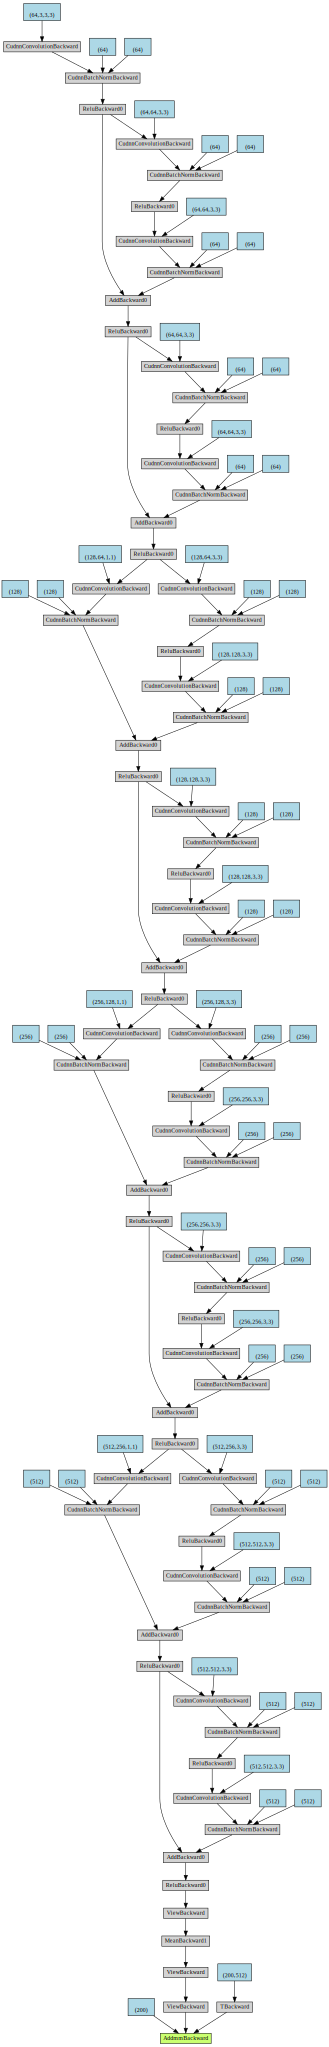

In [18]:
runner.print_visualization(input_size=(3, 64, 64))

# Find the Optimal LR

[ 2020-04-24 23:26:16,698 - sodium.sodium.runner ] INFO: finding the best learning rate
[ 2020-04-24 23:26:16,702 - sodium.sodium.utils.config ] INFO: Building: sodium.tsai_model.TinyImageNetS12Model
[ 2020-04-24 23:26:16,780 - sodium.sodium.utils.config ] INFO: Using device 0 of available devices [0]
[ 2020-04-24 23:26:16,797 - sodium.sodium.utils.config ] INFO: Building: torch.optim.SGD
[ 2020-04-24 23:26:16,806 - sodium.sodium.runner ] INFO: Running LR-Test for 20 epochs



Learning rate search finished. See the graph with {finder_name}.plot()
[ 2020-04-24 23:33:15,775 - sodium.sodium.runner ] INFO: sorted lrs : [0.88012, 0.9025974999999999, 0.90134875, 0.8988512500000001, 0.89385625, 0.8976025, 0.87887125, 0.8813687499999999, 0.89135875, 0.8926075]
[ 2020-04-24 23:33:15,776 - sodium.sodium.runner ] INFO: found the best lr : 0.88012
[ 2020-04-24 23:33:15,779 - sodium.sodium.runner ] INFO: plotting lr_finder


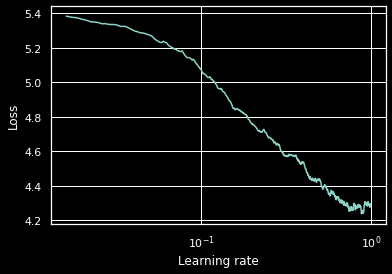

In [19]:
runner.find_lr()

In [20]:
runner.train(use_bestlr=True)

[ 2020-04-24 23:34:16,333 - sodium.sodium.runner ] INFO: using max_lr : 0.88012
[ 2020-04-24 23:34:16,334 - sodium.sodium.runner ] INFO: using min_lr : 0.029337333333333333
[ 2020-04-24 23:34:16,337 - sodium.sodium.runner ] INFO: using initial_lr : 0.044006
[ 2020-04-24 23:34:16,338 - sodium.sodium.base.base_trainer ] INFO: Starting training ...
[ 2020-04-24 23:34:16,339 - sodium.sodium.base.base_trainer ] INFO: Training the model for 50 epochs
[ 2020-04-24 23:34:16,339 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 1
[ 2020-04-24 23:34:16,340 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.088012



[ 2020-04-24 23:37:41,229 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 1
[ 2020-04-24 23:37:47,754 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 4.54038711, Accuracy: 7.85 (785/10000)
[ 2020-04-24 23:37:47,756 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 2
[ 2020-04-24 23:37:47,756 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.01065700250817625



[ 2020-04-24 23:41:12,818 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 2
[ 2020-04-24 23:41:19,268 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.97214397, Accuracy: 15.43 (1543/10000)
[ 2020-04-24 23:41:19,270 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 3
[ 2020-04-24 23:41:19,270 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.030425683034605022



[ 2020-04-24 23:44:44,442 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 3
[ 2020-04-24 23:44:50,983 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 4.37040116, Accuracy: 14.33 (1433/10000)
[ 2020-04-24 23:44:50,985 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 4
[ 2020-04-24 23:44:50,986 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.06270520993134843



[ 2020-04-24 23:48:16,028 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 4
[ 2020-04-24 23:48:22,498 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.20545985, Accuracy: 26.53 (2653/10000)
[ 2020-04-24 23:48:22,499 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 5
[ 2020-04-24 23:48:22,499 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.10651450804196994



[ 2020-04-24 23:51:47,237 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 5
[ 2020-04-24 23:51:53,793 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.16681344, Accuracy: 27.39 (2739/10000)
[ 2020-04-24 23:51:53,795 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 6
[ 2020-04-24 23:51:53,795 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.16052207662500095



[ 2020-04-24 23:55:18,811 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 6
[ 2020-04-24 23:55:25,206 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 4.43916075, Accuracy: 18.44 (1844/10000)
[ 2020-04-24 23:55:25,207 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 7
[ 2020-04-24 23:55:25,208 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.22308645780016134



[ 2020-04-24 23:58:50,083 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 7
[ 2020-04-24 23:58:56,612 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.74600893, Accuracy: 21.35 (2135/10000)
[ 2020-04-24 23:58:56,613 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 8
[ 2020-04-24 23:58:56,614 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.2923061255554641



[ 2020-04-25 00:02:21,654 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 8
[ 2020-04-25 00:02:28,406 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.40223690, Accuracy: 23.27 (2327/10000)
[ 2020-04-25 00:02:28,407 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 9
[ 2020-04-25 00:02:28,407 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.3660772790332084



[ 2020-04-25 00:05:53,311 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 9
[ 2020-04-25 00:05:59,867 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.70631576, Accuracy: 20.89 (2089/10000)
[ 2020-04-25 00:05:59,869 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 10
[ 2020-04-25 00:05:59,869 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.4421577835772632



[ 2020-04-25 00:09:24,774 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 10
[ 2020-04-25 00:09:31,341 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.53451741, Accuracy: 23.01 (2301/10000)
[ 2020-04-25 00:09:31,343 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 11
[ 2020-04-25 00:09:31,343 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.5182353161744656



[ 2020-04-25 00:12:56,502 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 11
[ 2020-04-25 00:13:03,008 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.82033331, Accuracy: 17.98 (1798/10000)
[ 2020-04-25 00:13:03,009 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 12
[ 2020-04-25 00:13:03,009 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.591997644138355



[ 2020-04-25 00:16:28,003 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 12
[ 2020-04-25 00:16:34,518 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 4.30617642, Accuracy: 14.23 (1423/10000)
[ 2020-04-25 00:16:34,520 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 13
[ 2020-04-25 00:16:34,520 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.6612029010475984


KeyboardInterrupt: ignored

## Plot the metrics

In [12]:
runner.plot_metrics()

[ 2020-04-24 23:04:30,811 - sodium.sodium.runner ] INFO: Plotting Metrics...


AttributeError: ignored